**INFO 2950 Final Project**

*generic intro about the impact of COVID-19*

*TO DO make this intro way more polished once you have a better idea of what you're doing*

The coronavirus pandemic has drastically changed the lives of Americans. Many adults have lost their jobs or are working remotely. Children are having to learn online. And many essential workers are feeling pressure of working on the front lines during this crisis.

How this may have long term effects on communities and vulnerable populations remains to be seen. My goal is to use 3 datasets to try to identify at-risk areas and trends. The data description will section will give a better understanding of these topics.

metrics to take note of:
* single parent households with children
* crowded households
* households that speak english less than well.
* ep_age17 percentage aged 17 or younger

* increases in covid cases
* usda atlas of rural america

**DATA DESCRIPTION**

What are the observations (rows) and the attributes (columns)?
* Data set "covid" 1 is of coronavirus cases and deaths by county
* Data set 2 "svi" is the Social Vulnerability index, which provides county data about population vulnerability based on measurements of a variety of factors. These factors are categorized by "socioeconomic status", "household composition & disability", "minority status & languge", and "housing type and transportation." A very large amount of measurements are included on this
* Data set three "unemp" is county economic data. It includes measures such as the rurality of the county, employment rates, median income, and median income relative to the rest of the state.
* I joined these datasets based on the FIPs county code. "svi" and "unemp" had a very large number of attributes, so while joining, I tried to filter the ones I thought would be most salient to this project. I will outline the attributes of the final table below:

# TODO ahhhh
* I'll detail all the attributes and their names (I will probably standardize the format of the names and make them shorter) in the final draft, I'm still not sure which ones I'm going to use.

Why was this dataset created?
* The Covid data was created by the New York Times for use in their own reporting and data visualizations. 
* The SVI was created to identify and classify vulnerable populations, so that governing agencies could develop emergency-preparedness analysis and plans.
* The county economic data was created by the Local Area Unemployment Statistics to measure economic growth and progress.

* My data set combining these factors was created to explore how economic and other risk factors may relate to areas that are particularly hard-hit by the virus.

Who funded the creation of the dataset?
* "covid" data is created and funded by the New York Times.
* "svi" data is created and funded by the government, specifically the Center for Disease Control (CDC) and Agency for Toxic Substances and Disease Registry (ATSDR)
* "unemp" data is created and funded by the US Economic Research Service

What processes might have influenced what data was observed and recorded and what was not?
* the main thing with the coronavirus data is just massive lack of and inconsistencies with testing
* additionally, a lot of SVI data appears to be missing or incomplete, I'm not entirely sure why this is but it seems like for some counties, the CDC doesn't feel confident enough to make approximations (maybe this is mostly for small/rural counties with low census response rates)

What preprocessing was done, and how did the data come to be in the form that you are using?
* I mostly had to use join statements to merge the data
* I also filtered out a lot of columns from the SVI and unemployment data, because these were very large datasets.
* Some of the SVI data uses -999 as a dummy variable, I'm still figuring out how and when to deal with that.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
* Most of this data is government data from census information
* The Covid data is also sourced from government press releases
* All the information is very depersonalized and only at a county level
* Also I think people generally expect that government collects depersonalized data and that their information might be used in a very broad sense to shape understanding and policy related to current events
* New York Times has generously made their data open-source so that others can benefit from and use the information they've collected


Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).

* "covid" : https://github.com/nytimes/covid-19-data
* "svi": https://svi.cdc.gov/data-and-tools-download.html
* "unemp": https://www.ers.usda.gov/data-products/county-level-data-sets/ 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
fulldata = pd.read_csv('finaldataset.csv')
fulldata.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,cases_per_capita,cases_per_100k,density,first_day,days_since_first,spread_speed
0,1001.0,AL,"Autauga County, AL",2.0,2.0,1.0,25957,25015,942,3.6,...,0.581,0.5947,0.3741,0.4354,0.000018,1.811594,92.859967,63.0,0.0,1.000000
1,1001.0,AL,"Autauga County, AL",2.0,2.0,1.0,25957,25015,942,3.6,...,0.581,0.5947,0.3741,0.4354,0.000072,7.246377,92.859967,63.0,1.0,7.246377
2,1001.0,AL,"Autauga County, AL",2.0,2.0,1.0,25957,25015,942,3.6,...,0.581,0.5947,0.3741,0.4354,0.000109,10.869565,92.859967,63.0,2.0,5.434783
3,1001.0,AL,"Autauga County, AL",2.0,2.0,1.0,25957,25015,942,3.6,...,0.581,0.5947,0.3741,0.4354,0.000109,10.869565,92.859967,63.0,3.0,3.623188
4,1001.0,AL,"Autauga County, AL",2.0,2.0,1.0,25957,25015,942,3.6,...,0.581,0.5947,0.3741,0.4354,0.000109,10.869565,92.859967,63.0,4.0,2.717391


A quirk worth noting about this data: unfortunately, the New York Times data combines the five boroughs (counties) that make up New York City into row to represent the whole city. For this reason, there was no valid way to merge it with the county level data -- it didn't have a FIPs code and it would be too time-consuming for the scope of this project to try to combine the borough data from the other data sets using some sort of weighted average system. 

Instead, I created an extra dataset called nyc of just the covid cases in New York City, to be used for comparisons.

In [7]:
covid = pd.read_csv('covid2.csv')
covid.rename(columns={'fips':'FIPS'}, inplace=True)

covid['date'] = pd.to_datetime(covid["date"])
start_date = pd.Timestamp("2020-01-21")
covid["daysafter"] = (covid["date"] - start_date).dt.days

nyc = covid[covid['county']=='New York City']
nyc = nyc.assign(cases_per_capita = nyc['cases']/8398748)
nyc.head()

,date,county,state,FIPS,cases,deaths,daysafter,cases_per_capita
416,2020-03-01,New York City,New York,NaN,1,0,40,1.190654e-07
448,2020-03-02,New York City,New York,NaN,1,0,41,1.190654e-07
482,2020-03-03,New York City,New York,NaN,2,0,42,2.381307e-07
518,2020-03-04,New York City,New York,NaN,2,0,43,2.381307e-07
565,2020-03-05,New York City,New York,NaN,4,0,44,4.762615e-07


If we are not mapping the change in COVID over time, it will be easiest to look at the data just using the most recent day. I create the latest_date data subset for this. To check this, I display a model of COVID cases and deaths.

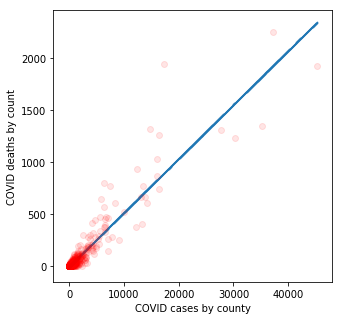

Model slope:      0.05177519870086469
Model intercept:  -0.29075646266553434
Correlation:      0.9394334164108455


In [8]:
latest_date = fulldata[fulldata['date']=='2020-05-05']

cases_vs_deaths = LinearRegression(fit_intercept=True)
cases_vs_deaths.fit(latest_date[['cases']], latest_date['deaths'])
xfit = np.linspace(0, latest_date['cases'].max(),1000)
yfit = cases_vs_deaths.predict(xfit[:,np.newaxis])
                            

plt.figure(figsize=(5,5))
plt.scatter(xfit,yfit,s=.5)
plt.scatter(latest_date['cases'], latest_date['deaths'], alpha=.1, color='red')

plt.xlabel('COVID cases by county')
plt.ylabel('COVID deaths by count')
plt.show()

print("Model slope:     ", cases_vs_deaths.coef_[0])
print("Model intercept: ", cases_vs_deaths.intercept_)
print("Correlation:     ", np.corrcoef(latest_date['cases'], latest_date['deaths'])[0][1])

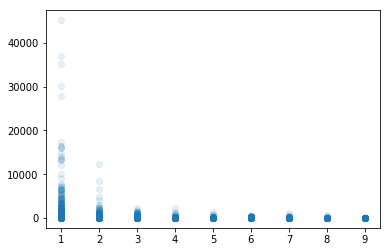

In [9]:
plt.scatter(latest_date['Rural_urban_continuum_code_2013'], latest_date['cases'], alpha=.1)
plt.show()

In [10]:
latest_date.sort_values(by='cases', ascending=False).head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,cases_per_capita,cases_per_100k,density,first_day,days_since_first,spread_speed
25361,17031.0,IL,"Cook County, IL",1.0,1.0,1.0,2611512,2506103,105409,4.0,...,0.0946,0.9618,0.8758,0.6755,0.008657,865.724209,5528.126575,3.0,102.0,8.487492
69532,36059.0,NY,"Nassau County, NY",1.0,1.0,1.0,707875,682848,25027,3.5,...,0.0392,0.9105,0.5546,0.2430,0.027387,2738.683910,4766.729993,44.0,61.0,44.896458
70464,36103.0,NY,"Suffolk County, NY",1.0,1.0,1.0,777784,747832,29952,3.9,...,0.0369,0.8545,0.4288,0.2146,0.023708,2370.789454,1631.869696,47.0,58.0,40.875680
70888,36119.0,NY,"Westchester County, NY",1.0,1.0,1.0,484256,465428,18828,3.9,...,0.0853,0.9392,0.9386,0.5516,0.031212,3121.235736,2250.086937,43.0,62.0,50.342512
8005,6037.0,CA,"Los Angeles County, CA",1.0,1.0,1.0,5136341,4896512,239829,4.7,...,0.1047,0.9933,0.9045,0.7682,0.002754,275.449166,2488.313394,5.0,100.0,2.754492


It looks like areas that are 1 on the rural urban continuum seem to have the most cases. These are larger cities, so this makes sense. But then this isn't a very useful measurement. Of course cities with more people tend to have more cases! We need to look at the infections per capita to get any sort of meaningful county information.

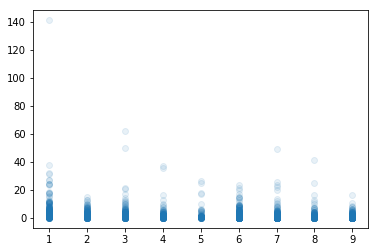

In [11]:
plt.scatter(latest_date['Rural_urban_continuum_code_2013'], latest_date['cases_per_100k']/100, alpha=.1)
plt.show()

In [12]:
model1 = LinearRegression(fit_intercept=True)

model1.fit(latest_date[['Rural_urban_continuum_code_2013', 'Urban_influence_code_2013']], latest_date['cases_per_capita'])

# print('rur-urb-cont  urban-influence')
# print(model1.coef_)

print('r^2 of rural urban continuum and case per capita at most recent date: ', np.corrcoef(latest_date['Rural_urban_continuum_code_2013'], latest_date['cases_per_capita'])[0,1])
print('r^2 of urban influence and case per capita at most recent date:       ', np.corrcoef(latest_date['Urban_influence_code_2013'], latest_date['cases_per_capita'])[0,1])


r^2 of rural urban continuum and case per capita at most recent date:  -0.11683351163137934
r^2 of urban influence and case per capita at most recent date:        -0.11112144070580203


It seems like at this point, because the virus is widespread, the rural urban contiuum and the urban influence don't have any significant correlation with the extent of the outbreak in each county. But there are a few huge outliers in terms of the cases per capita. In fact, if anything, more rural areas may have higher infection rates per capita, even though metro areas are more densely populated. 

But let's take a look at a few of the cities with the highest per capita infection rates.

In [13]:
latest_date.sort_values(by='cases_per_capita', ascending=False).head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,cases_per_capita,cases_per_100k,density,first_day,days_since_first,spread_speed
94585,47169.0,TN,"Trousdale County, TN",1.0,1.0,1.0,4888,4729,159,3.3,...,0.2200,0.4177,0.2862,0.5220,0.141231,14123.054424,83.722788,67.0,38.0,371.659327
5763,5079.0,AR,"Lincoln County, AR",3.0,2.0,1.0,4041,3867,174,4.3,...,0.2146,0.6390,0.9873,0.8134,0.062286,6228.550566,24.387353,55.0,50.0,124.571011
63476,31043.0,NE,"Dakota County, NE",3.0,2.0,1.0,10777,10404,373,3.5,...,0.5419,0.9599,0.8055,0.8615,0.049909,4990.894325,76.883504,82.0,23.0,216.995405
53275,27105.0,MN,"Nobles County, MN",7.0,8.0,0.0,11284,10988,296,2.6,...,0.6657,0.9325,0.7533,0.8150,0.048949,4894.912771,30.540053,80.0,25.0,195.796511
91251,47007.0,TN,"Bledsoe County, TN",8.0,7.0,0.0,4303,4053,250,5.8,...,0.2735,0.5769,0.8233,0.8159,0.041159,4115.874538,35.927927,67.0,38.0,108.312488


Let's look at how New York City's growth in coronavirus cases compares to some of the most affected counties.

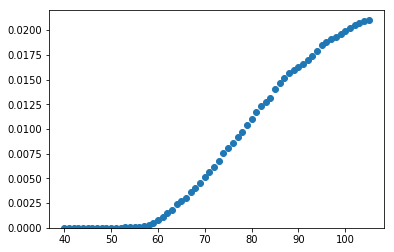

In [14]:
plt.scatter(nyc['daysafter'], nyc['cases_per_capita'])
plt.ylim(0,.022)
plt.show()

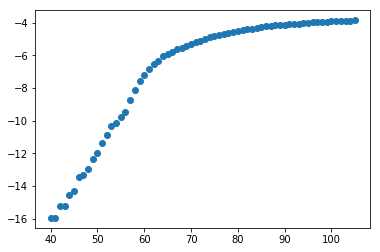

In [15]:
plt.scatter(nyc['daysafter'], np.log(nyc['cases_per_capita']))
plt.show()

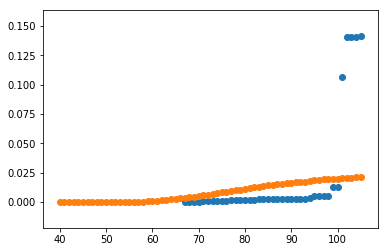

In [16]:
trousdale_county = fulldata[ fulldata['FIPS'] == 47169.0]

plt.scatter(trousdale_county['daysafter'], trousdale_county['cases_per_capita'])
plt.scatter(nyc['daysafter'], nyc['cases_per_capita'])
plt.show()


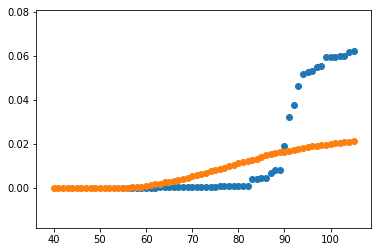

In [17]:
lincoln_county = fulldata[ fulldata['FIPS'] == 5079.0]

plt.scatter(lincoln_county['daysafter'], lincoln_county['cases_per_capita'])
plt.scatter(nyc['daysafter'], nyc['cases_per_capita'])
plt.show()

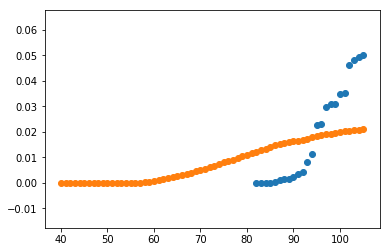

In [18]:
dakota_county = fulldata[ fulldata['FIPS'] == 31043.0]

plt.scatter(dakota_county['daysafter'], dakota_county['cases_per_capita'])
plt.scatter(nyc['daysafter'], nyc['cases_per_capita'])
plt.show()

# TODO explain results

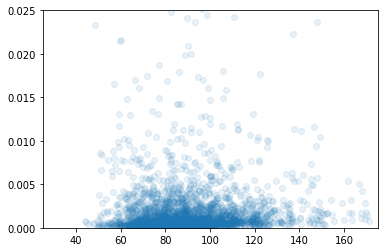

0.05206826701655316

In [19]:
plt.scatter(latest_date['Med_HH_Income_Percent_of_State_Total_2018'], latest_date['cases_per_capita'], alpha = .1)
plt.ylim(0,.025)
plt.xlim(25,175)
plt.show()

np.corrcoef(latest_date['Med_HH_Income_Percent_of_State_Total_2018'], latest_date['cases_per_capita'])[0][1]

In [20]:
for col in latest_date:
    if not isinstance(latest_date[col].values[0], str) and col != 'date' and col !='daysafter':
        print(col, ':   ', np.corrcoef(latest_date[col], latest_date['cases_per_capita'])[0][1])

FIPS :    -0.05628655444407967
Rural_urban_continuum_code_2013 :    -0.11683351163137934
Urban_influence_code_2013 :    -0.11112144070580203
Metro_2013 :    0.10134652959706575
Civilian_labor_force_2018 :    0.09433488875547485
Employed_2018 :    0.09442146038780339
Unemployed_2018 :    0.0904071533602748
Unemployment_rate_2018 :    -0.004087259455180757
Median_Household_Income_2018 :    0.08278533851541801
Med_HH_Income_Percent_of_State_Total_2018 :    0.05206826701655316
cases :    0.3454599748497979
deaths :    0.3095288580801325
ST :    -0.05629256345175669
AREA_SQMI :    -0.032881346074301765
E_TOTPOP :    0.09323240109390993
E_PCI :    0.053227306175656054
EP_POV :    0.015606561922483926
EP_NOHSDP :    0.10491278560383165
EP_AGE65 :    -0.14021456088440573
EP_AGE17 :    0.04134188047164187
EP_DISABL :    -0.10156516222241814
EP_SNGPNT :    0.12093291917841323
EP_MINRTY :    0.1845376509794251
EP_LIMENG :    0.17920959977110082
EP_MUNIT :    0.1129789167844957
EP_MOBILE :    -0.0

In [34]:
for col in latest_date:
    if not isinstance(latest_date[col].values[0], str) and col != 'date' and col !='daysafter':
        print(col, ':   ', np.corrcoef(latest_date[col], latest_date['spread_speed'])[0][1])

FIPS :    -0.02815480872745207
Rural_urban_continuum_code_2013 :    0.0019472738290921116
Urban_influence_code_2013 :    -0.008012665138090947
Metro_2013 :    0.01237614891615294
Civilian_labor_force_2018 :    0.014218109896578412
Employed_2018 :    0.01419354328156814
Unemployed_2018 :    0.014499120320873679
Unemployment_rate_2018 :    -0.02708788049344309
Median_Household_Income_2018 :    0.016211498323627817
Med_HH_Income_Percent_of_State_Total_2018 :    0.0020849044480281257
cases :    0.1459201025637863
deaths :    0.12465080679339771
ST :    -0.02824413700640344
AREA_SQMI :    -0.022348223685070803
E_TOTPOP :    0.013623938731483699
E_PCI :    -0.005949536825934785
EP_POV :    0.013165225302277919
EP_NOHSDP :    0.08655610523837544
EP_AGE65 :    -0.05339441686844558
EP_AGE17 :    0.03562522132408187
EP_DISABL :    -0.06020154166873179
EP_SNGPNT :    0.03242971112731271
EP_MINRTY :    0.09681801855358868
EP_LIMENG :    0.10889652914362248
EP_MUNIT :    0.016842157849538013
EP_MOB

# TODO
so it turns out that nothing is correlated to cases per capita... back to the drawing board :/

0.0019472738290921116


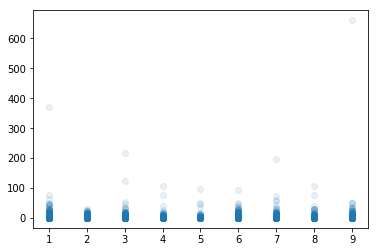

In [33]:
print(np.corrcoef(latest_date['Rural_urban_continuum_code_2013'], latest_date['spread_speed'])[0][1])

plt.scatter(latest_date['Rural_urban_continuum_code_2013'], latest_date['spread_speed'],alpha=.1)
plt.show()

In [22]:
# np.corrcoef(latest_date['Unemployment_rate_2018'], latest_date['Median_Household_Income_2018'])[0][1]

# plt.scatter(latest_date['Unemployment_rate_2018'], latest_date['Median_Household_Income_2018'], alpha=.1)
# plt.show()

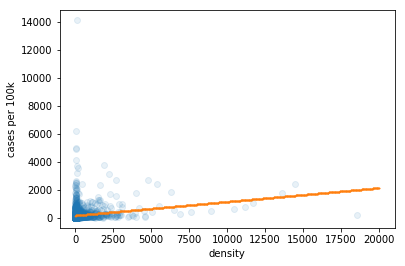

Model slope:      0.09862137008026778
Model intercept:  171.84984145443613
Correlation:      0.18206289174822982


In [23]:
plt.scatter(latest_date['density'], latest_date['cases_per_100k'], alpha = .1)

percap_vs_density = LinearRegression(fit_intercept=True)
percap_vs_density.fit(np.array(latest_date['density']).reshape(-1,1), latest_date['cases_per_100k'])
xfit2 = np.linspace(0, 20000, 1000)
yfit2 = percap_vs_density.predict(xfit2[:,np.newaxis])

plt.xlabel('density')
plt.ylabel('cases per 100k')

plt.scatter(xfit2,yfit2, s=.5)
plt.show()

print("Model slope:     ", percap_vs_density.coef_[0])
print("Model intercept: ", percap_vs_density.intercept_)
print("Correlation:     ", np.corrcoef(np.array(latest_date['E_TOTPOP']/latest_date['AREA_SQMI']), latest_date['cases_per_capita']*100000)[0][1])


In [24]:
latest_date['E_TOTPOP'].max()

10098052

In [25]:
latest_date['E_TOTPOP'].min()

454

In [26]:
def permuted_y():
    return np.random.permutation(latest_date['cases_per_100k'].copy())

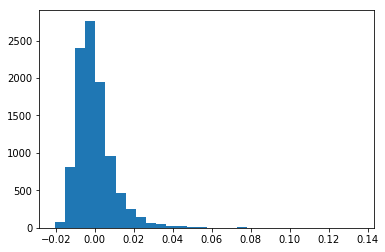

In [27]:
simul = np.zeros(10000)

for i in range(10000):
    model = LinearRegression().fit(latest_date[['density']], permuted_y())
    simul[i] = model.coef_[0]


plt.hist(simul, bins=30)
plt.show()


In [28]:
print('count out of 10000 random samples:  ', np.count_nonzero(simul > .0986))

count out of 10000 random samples:   6


In [30]:
latest_date.sort_values(by='spread_speed', ascending=False).head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,...,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,cases_per_capita,cases_per_100k,density,first_day,days_since_first,spread_speed
64199,31117.0,NE,"McPherson County, NE",9.0,8.0,0.0,440,429,11,2.5,...,0.1646,0.0417,0.0643,0.0838,0.006608,660.792952,0.528537,104.0,1.0,660.792952
94585,47169.0,TN,"Trousdale County, TN",1.0,1.0,1.0,4888,4729,159,3.3,...,0.2200,0.4177,0.2862,0.5220,0.141231,14123.054424,83.722788,67.0,38.0,371.659327
63476,31043.0,NE,"Dakota County, NE",3.0,2.0,1.0,10777,10404,373,3.5,...,0.5419,0.9599,0.8055,0.8615,0.049909,4990.894325,76.883504,82.0,23.0,216.995405
53275,27105.0,MN,"Nobles County, MN",7.0,8.0,0.0,11284,10988,296,2.6,...,0.6657,0.9325,0.7533,0.8150,0.048949,4894.912771,30.540053,80.0,25.0,195.796511
5763,5079.0,AR,"Lincoln County, AR",3.0,2.0,1.0,4041,3867,174,4.3,...,0.2146,0.6390,0.9873,0.8134,0.062286,6228.550566,24.387353,55.0,50.0,124.571011


0.061684346346744544


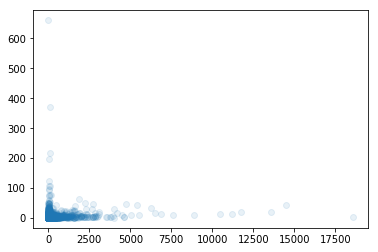

In [32]:
print(np.corrcoef(latest_date['density'], latest_date['spread_speed'])[0][1])

plt.scatter(latest_date['density'], latest_date['spread_speed'],alpha=.1)
plt.show()